# Sentiment140 데이터셋 분석

## 데이터셋 설명

`Sentiment140` 데이터셋은 트위터에서 수집된 160만 개의 트윗으로 구성되어 있으며, 감정 분석을 위해 라벨링된 데이터이다. 각 트윗은 감정 레이블(긍정 또는 부정)과 함께 제공된다.

- **데이터셋 출처**: [Sentiment140 on Kaggle](https://www.kaggle.com/datasets/kazanova/sentiment140)
- **데이터 포맷**: CSV 파일
- **컬럼 설명**:
  - `Sentiment`: 트윗의 감정 레이블 (0: 부정, 4: 긍정)
  - `ID`: 각 트윗의 고유 식별자(ID)
  - `Date`: 트윗이 작성된 날짜와 시간 (2009.04.06 ~ 2009.06.25)
  - `Query`: 트윗이 특정한 쿼리로 검색되었는지 여부 판단
  - `User`: 트윗을 작성한 사용자의 트위터 핸들(사용자 이름)
  - `Text`: 트윗의 실제 내용(텍스트)


---
## 가설 설정

본 분석에서는 다음과 같은 가설을 설정하고 검증을 기반으로 한다.

### **트윗의 길이와 작성 일자, 작성 시간대와 감정(긍정/부정) 사이에는 상관관계**
- 귀무 가설 (H0): **트윗의 길이**, **작성 일자**, **작성 시간대**와 감정(긍정/부정) 사이에는 상관관계가 없다.
- 대립 가설 (H1): **트윗의 길이**, **작성 일자**, **작성 시간대**와 감정(긍정/부정) 사이에는 상관관계가 있다.


이 가설들을 바탕으로 `Sentiment140` 데이터셋을 분석하고, 통계적 검정을 통해 상관관계를 확인하여 프로젝트를 수행한다.

---


# 1. 데이터 로드
- 데이터를 로드하여, 전처리가 필요하다면 이를 수행한다.
- `Sentiment140` 데이터셋을 로드하고, 필요한 칼럼 추가하여 가설을 검증하기 위한 단계이다.

## 1-1. 라이브러리 정의

In [5]:
# 다차원 배열 및 행렬 기반 데이터프레임 처리를 위한 라이브러리
import pandas as pd
import numpy as np

# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# T-검정 (두 개의 독립된 표본이 다른지 테스트), 카이제곱 검정(범주형 데이터 간의 독립성 검증)을 위한 라이브러리
from scipy.stats import ttest_ind, chi2_contingency

## 1-2. 데이터셋 로드

In [7]:
# url = 'https://www.kaggle.com/datasets/kazanova/sentiment140'
df = pd.read_csv('Sentiment140.csv', encoding='latin-1')
df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


---
# 2. 데이터 전처리

# 2-1. 칼럼명 추가하기
- Column 0 (Sentiment)
- Column 1 (ID)
- Column 2 (Date) 
- Column 3 (Query) 
- Column 4 (User)
- Column 5 (Text)

In [10]:
df.columns = ['Sentiment', 'ID', 'Date', 'Query', 'User', 'Text']

In [11]:
df

,Sentiment,ID,Date,Query,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


## 2-2. Query 열 제거하기
- 상관관계 분석에 불필요한 Query 열 제거

In [13]:
df = df.drop(columns=["Query"])
df

,Sentiment,ID,Date,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


## 2-3. 트윗 길이 칼럼 추가
- 트윗 길이와 감정의 상관관계 분석을 위한 열 추가

In [15]:
df['Tw_Len'] = df['Text'].apply(len)

In [16]:
df.head()

,Sentiment,ID,Date,User,Text,Tw_Len
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,111
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,89
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,47
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",111
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew,29


## 2-4. 감정 레이블 변환 
- 부정: 0 -> Negative
- 긍정: 4 -> Positive

In [18]:
df['Sentiment'] = df['Sentiment'].replace({0: 'Negative', 4: 'Positive'})

In [19]:
df.head()

,Sentiment,ID,Date,User,Text,Tw_Len
0,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...,111
1,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...,89
2,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,47
3,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all....",111
4,Negative,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew,29


## 2-5. Date 형식 변환 및 오름차순 정렬

In [21]:
import warnings
warnings.filterwarnings('ignore')

### 2-5-1. Date 컬럼을 datetime 형식으로 변환 및 시간대 설정

In [23]:
df['Date'] = pd.to_datetime(df['Date'], format='%a %b %d %H:%M:%S PDT %Y')
df['Date'] = df['Date'].dt.tz_localize('US/Pacific', ambiguous='NaT', nonexistent='NaT')

### 2-5-2. 시간 정보를 기반으로 시간대 범주화 (Night, Morning, Afternoon, Evening) 및 칼럼 추가

In [25]:
df['time_of_day'] = df['Date'].dt.hour
df['time_of_day'] = pd.cut(df['time_of_day'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

### 2-5-3. Date 칼럼의 일자 가공

In [27]:
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

### 2-5-4. Date, Sentiment 기준 데이터프레임 정렬

In [29]:
df = df.sort_values(by=['Date', 'Sentiment'], ascending=[True, False])
df.head()

,Sentiment,ID,Date,User,Text,Tw_Len,time_of_day
799999,Positive,1467822272,2009-04-06,ersle,I LOVE @Health4UandPets u guys r the best!!,44,Evening
800000,Positive,1467822273,2009-04-06,becca210,im meeting up with one of my besties tonight! ...,72,Evening
800001,Positive,1467822283,2009-04-06,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",137,Evening
800002,Positive,1467822287,2009-04-06,katarinka,Being sick can be really cheap when it hurts t...,104,Evening
800003,Positive,1467822293,2009-04-06,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,47,Evening


## 2-6. Positive와 Negative 데이터의 형평성 조절을 위한 필터링
- Negative: 2009-04-06 ~ 2009-06.25
  - -> 2009-04-06 ~ 2009-06-16
- Positive: 2009-04-06 ~ 2009-06.16

In [31]:
# Date 열을 datetime 형식으로의 형 변환 
df['Date'] = pd.to_datetime(df['Date'])

In [32]:
target_date = pd.to_datetime('2009-06-16')
df = df[~((df['Sentiment'] == 'Negative') & (df['Date'] > target_date))]
df.tail()

,Sentiment,ID,Date,User,Text,Tw_Len,time_of_day
553114,Negative,2203551449,2009-06-16,DaisyFab,Yea I kno U go down there? @jknowtruth,39,Evening
553115,Negative,2203551573,2009-06-16,Daveyasprey,I do not feel up for work today haha. Soo sooo...,54,Evening
553116,Negative,2203552066,2009-06-16,Sportygal52,@sucka99 long time no talk! so its official wi...,71,Evening
553117,Negative,2203552161,2009-06-16,Otislam,"I can see the sun shine, the breeze and the pe...",112,Evening
553118,Negative,2203552500,2009-06-16,_yvette,@xivyy What's tfln? Never heard of it,38,Evening


In [115]:
# 246,880개의 데이터 삭제
df

,Sentiment,ID,Date,User,Text,Tw_Len,time_of_day
799999,Positive,1467822272,2009-04-06,ersle,I LOVE @Health4UandPets u guys r the best!!,44,Evening
800000,Positive,1467822273,2009-04-06,becca210,im meeting up with one of my besties tonight! ...,72,Evening
800001,Positive,1467822283,2009-04-06,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",137,Evening
800002,Positive,1467822287,2009-04-06,katarinka,Being sick can be really cheap when it hurts t...,104,Evening
800003,Positive,1467822293,2009-04-06,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,47,Evening
...,...,...,...,...,...,...,...
553114,Negative,2203551449,2009-06-16,DaisyFab,Yea I kno U go down there? @jknowtruth,39,Evening
553115,Negative,2203551573,2009-06-16,Daveyasprey,I do not feel up for work today haha. Soo sooo...,54,Evening
553116,Negative,2203552066,2009-06-16,Sportygal52,@sucka99 long time no talk! so its official wi...,71,Evening
553117,Negative,2203552161,2009-06-16,Otislam,"I can see the sun shine, the breeze and the pe...",112,Evening


---
# 3. 데이터 시각화
1) 트윗 길이와 감정
2) 트윗 작성 일자와 감정
3) 트윗 작성 시간대와 감정

## 3-1. 트윗 길이와 감정의 분포 시각화

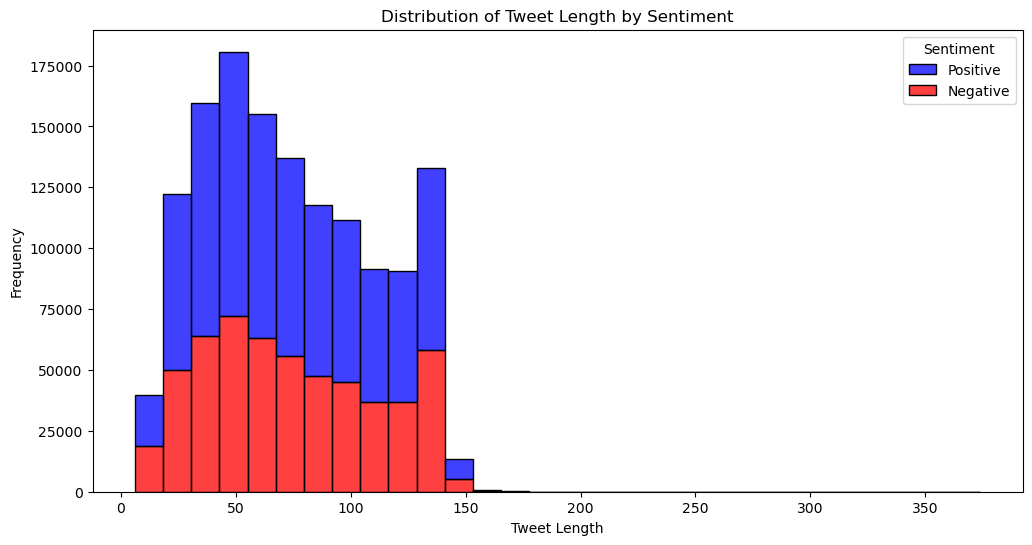

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Tw_Len', hue='Sentiment', multiple='stack',bins=30, palette={'Negative':'red', 'Positive': 'blue'})
plt.title('Distribution of Tweet Length by Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

## 3-2. 트윗 작성 일정과 감정의 분포 시각화

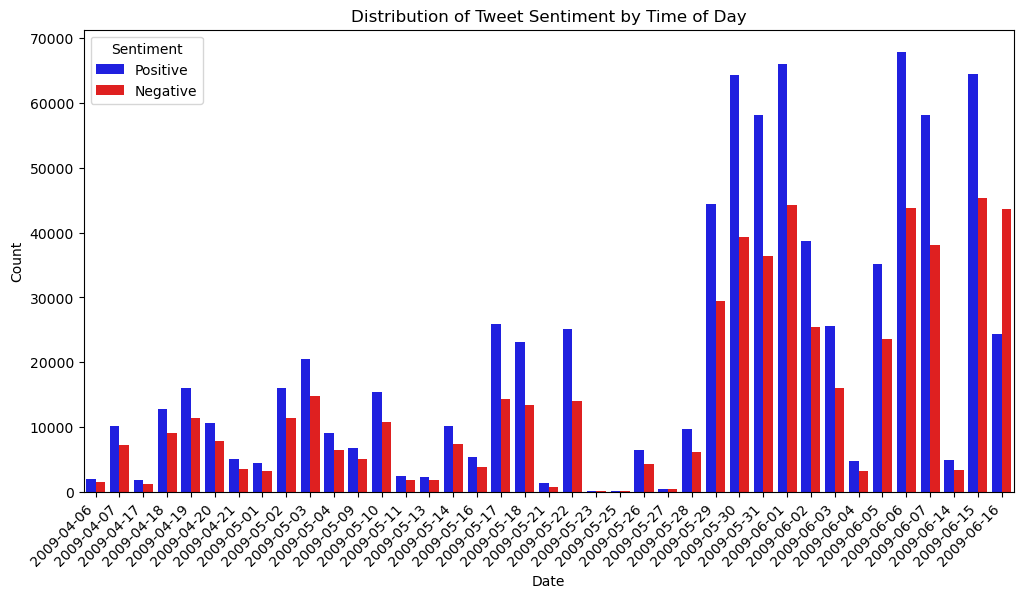

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Date', hue='Sentiment', palette={'Negative':'red', 'Positive': 'blue'})
plt.title('Distribution of Tweet Sentiment by Time of Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## 3-3. 시간대와 감정의 분포 시각화

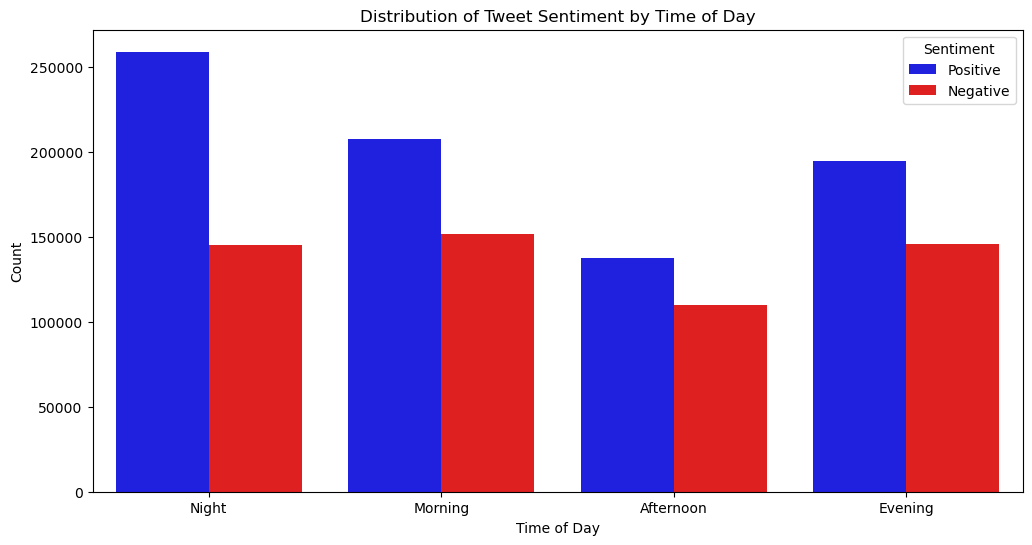

In [40]:
# 시간대과 감정의 분포 시각화
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='time_of_day', hue='Sentiment', palette={'Negative':'red', 'Positive': 'blue'})
plt.title('Distribution of Tweet Sentiment by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

---

# 4. 가설 검정

## 4-1. 귀무 가설 검정: 트윗의 길이와 감정(긍정/부정) 사이에는 상관관계가 없다.

### 4-1-1. 감정별 트윗 길이 추출

In [45]:
pos_tweets = df[df['Sentiment'] == 'Positive']['Tw_Len']
neg_tweets = df[df['Sentiment'] == 'Negative']['Tw_Len']

### 4-1-2. T-검정 수행

In [47]:
t_stat, p_value = ttest_ind(pos_tweets, neg_tweets, equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-Value (Tweet Length vs Sentiment): {p_value}")

T-Statistic: -4.158769322383248
P-Value (Tweet Length vs Sentiment): 3.1998946437679734e-05


### 4-1-3. 유의 수준(significance level)과의 비교
- 유의 수준 (sig_lv) : 0.5

In [49]:
sig_lv = 0.5

if p_value < sig_lv:
    print("귀무 가설 채택: 트윗 길이와 감정 사이에 상관관계가 없다.")
else:
    print("귀무 가설 기각: 트윗 길이와 감정 사이에 상관관계가 있다.")

귀무 가설 채택: 트윗 길이와 감정 사이에 상관관계가 없다.


### 귀무 가설 채택: 트윗 길이와 감정 사이에 상관관계가 있다.


---

## 4-2. 귀무 가설 검정: 트윗의 작성 일자와 감정(긍정/부정) 사이에는 상관관계가 없다.

### 4-2-1. 감정별 작성 일자 추출

In [54]:
posting_date = pd.crosstab(df['Date'], df['Sentiment'])

### 4-2-2. 카이제곱 검정 수행

In [56]:
chi2, p_value_date, _, _ = chi2_contingency(posting_date)

In [57]:
print(f"Chi2-Statistic (Date vs Sentiment): {chi2}")
print(f"P-Value (Date vs Sentiment): {p_value_date}")

Chi2-Statistic (Date vs Sentiment): 17586.994437760637
P-Value (Date vs Sentiment): 0.0


### 4-2-3. 유의 수준과의 비교
- 유의 수준 (sig_lv): 0.5

In [60]:
if p_value_date < sig_lv:
    print("귀무 가설 채택: 작성 일자와 감정 사이에 상관관계가 없다.")
else:
    print("귀무 가설 기각: 작성 일자와 감정 사이에 상관관계가 있다.")

귀무 가설 채택: 작성 일자와 감정 사이에 상관관계가 없다.


### 귀무 가설 채택: 작성 일자와 감정 사이에 상관관계가 없다.

---

## 4-3. 귀무 가설 검정: 트윗 작성 시간대와 감정(긍정/부정) 사이에는 상관관계가 없다.

### 4-3-1. 감정별 작성 시간대 추출

In [65]:
posting_time = pd.crosstab(df['time_of_day'], df['Sentiment'])

### 4-3-2. 카이제곱 검정 수행

In [67]:
chi2, p_value_time, _, _ = chi2_contingency(posting_time)

In [68]:
print(f"Chi2-Statistic (Date vs Sentiment): {chi2}")
print(f"P-Value (Date vs Sentiment): {p_value_date}")

Chi2-Statistic (Date vs Sentiment): 6157.93112859529
P-Value (Date vs Sentiment): 0.0


### 4-3-3. 유의 수준과의 비교

In [119]:
if p_value_date < sig_lv:
    print("귀무 가설 채택: 작성 일자와 감정 사이에 상관관계가 없다.")
else:
    print("귀무 가설 기각: 작성 일자와 감정 사이에 상관관계가 있다.")

귀무 가설 채택: 작성 일자와 감정 사이에 상관관계가 없다.


### 귀무 가설 채택: 작성 일자와 감정 사이에 차이가 없다.

---

## 결론: 트윗의 길이와 작성 일자, 작성 시간대와 감정(긍정/부정) 사이에는 상관관계가 없다.